## Obesity Prediction Project

In [1]:
## Using Kaggle Dataset to predict Obesity Outcomes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!kaggle datasets download -d adeniranstephen/obesity-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
obesity-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

with zipfile.ZipFile("obesity-prediction-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("obesity_dataset")

In [4]:
import os

print(os.listdir())

['.ipynb_checkpoints', 'Obesity Project.ipynb', 'obesity-prediction-dataset.zip', 'ObesityDataSet_raw_and_data_sinthetic.csv', 'obesity_dataset', 'README.md']


In [5]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [6]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df.shape

(2111, 17)

In [9]:
## looking for na values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
## looking for duplicate values
df.duplicated().sum()

24

In [11]:
## dropping duplicates
df = df.drop_duplicates()

In [12]:
## checking if removal of duplicates worked
df.duplicated().sum()

0

## Encoding

In [13]:
## Import LAbel Encoder
## Useful when planning to do a logistical regression or classfication models
from sklearn.preprocessing import LabelEncoder

In [14]:
## Instanciate
le = LabelEncoder()

In [15]:
# for loop that goes by column and encodes it for processing
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
        
        print(f"Column: {column}")
        print(f"Values pre encoding: {df[column].astype('category').cat.categories.tolist()}")
        print(f"Values post encoding: {df[column].unique()}\n")

Column: Gender
Values pre encoding: [0, 1]
Values post encoding: [0 1]

Column: family_history_with_overweight
Values pre encoding: [0, 1]
Values post encoding: [1 0]

Column: FAVC
Values pre encoding: [0, 1]
Values post encoding: [0 1]

Column: CAEC
Values pre encoding: [0, 1, 2, 3]
Values post encoding: [2 1 0 3]

Column: SMOKE
Values pre encoding: [0, 1]
Values post encoding: [0 1]

Column: SCC
Values pre encoding: [0, 1]
Values post encoding: [0 1]

Column: CALC
Values pre encoding: [0, 1, 2, 3]
Values post encoding: [3 2 1 0]

Column: MTRANS
Values pre encoding: [0, 1, 2, 3, 4]
Values post encoding: [3 4 0 2 1]

Column: NObeyesdad
Values pre encoding: [0, 1, 2, 3, 4, 5, 6]
Values post encoding: [1 5 6 2 0 3 4]



## Data Exploration

In [16]:
## what percent of the population in the df is male and female
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [17]:
## Male percentage of population
## 1 = men, 0 = women
percentage_men = (df['Gender']==1).sum()/df.shape[0]*100
percentage_men
percentage_men_str = f"{percentage_men:.2f}%" 
print(f"The percent of males in this sample is {percentage_men_str}")

The percent of males in this sample is 50.41%


In [18]:
## Female percentage of population
percentage_women = (df['Gender']==0).sum()/df.shape[0]*100
percentage_women
percentage_women_str = f"{percentage_women:.2f}%" 
print(f"The percent of females in this sample is {percentage_women_str}")

The percent of females in this sample is 49.59%


In [19]:
sns.set_style('whitegrid')

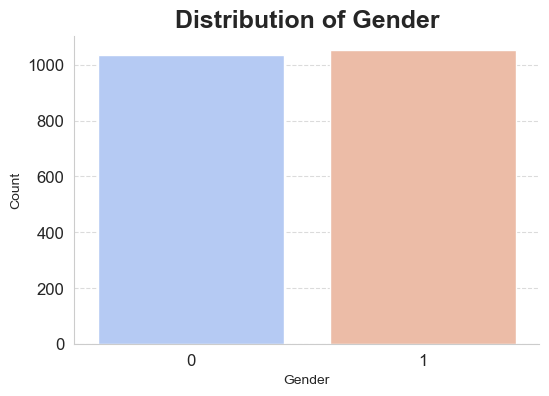

In [20]:
## lets see it visually

plt.figure(figsize=(6,4))
sns.countplot(x=df["Gender"], palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender",fontsize=18,fontweight ='bold')
sns.despine()  # Removes top & right border for a cleaner look
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add light gridlines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [22]:
## I want to know how tall the average men and women are.
df.groupby('Gender')['Height'].mean()

Gender
0    1.643739
1    1.760542
Name: Height, dtype: float64

In [23]:
## Mean Male height
avg_male_height = df[df['Gender'] == 1]['Height'].mean()
print(f"The average male height is {avg_male_height:.2f} meters")

The average male height is 1.76 meters


In [24]:
## Mean Female height
avg_female_height = df[df['Gender'] == 0]['Height'].mean()
print(f"The average female height is {avg_female_height:.2f} meters")

The average female height is 1.64 meters


In [25]:
## I want to know how heavy the average men and women are.
df.groupby('Gender')['Weight'].mean()

Gender
0    82.551121
1    91.096683
Name: Weight, dtype: float64

In [26]:
## Mean male weight
avg_male_weight = df[df['Gender'] == 1]['Weight'].mean()
print(f"The average male weight is {avg_male_weight:.2f} kilograms")

The average male weight is 91.10 kilograms


In [27]:
## Mean female weight
avg_female_weight = df[df['Gender'] == 0]['Weight'].mean()
print(f"The average female weight is {avg_female_weight:.2f} kilograms")

The average female weight is 82.55 kilograms


In [28]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [29]:
## Is the dataset balanced with the family history with overweight?
## 1 = yes, 2= no
(df['family_history_with_overweight']==1).sum()/df.shape[0]*100
# most of our dataset contain people with a family history of obesity

82.5107810253953

In [30]:
df['family_history_with_overweight'].unique()

array([1, 0])

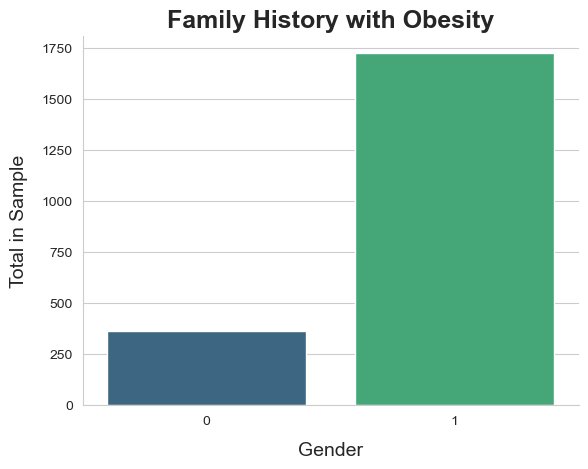

In [31]:
## Visualizing previous assesment
sns.countplot(x = df['family_history_with_overweight'],palette='viridis')
plt.title('Family History with Obesity',fontsize = 18, fontweight = 'bold')
plt.xlabel('Gender',fontsize = 14, labelpad = 10)
plt.ylabel('Total in Sample',fontsize = 14, labelpad = 10)
sns.despine()
plt.show()

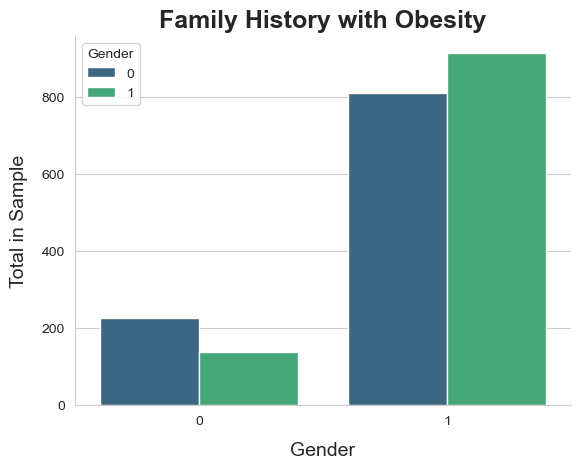

In [32]:
## Visualising assesment by Gender
sns.countplot(x = df['family_history_with_overweight'], hue= df['Gender'],palette='viridis')
plt.title('Family History with Obesity',fontsize = 18, fontweight = 'bold')
plt.xlabel('Gender',fontsize = 14, labelpad = 10)
plt.ylabel('Total in Sample',fontsize = 14, labelpad = 10)
sns.despine()
plt.show()
## Interesting, we have a higher proportion of men with a history of obesity in the family than women.

In [33]:
## Percent of our sample that smokes
## Smokes = 1, non smoker = 0
percent_does_not_smoke = (df['SMOKE']==0).sum()/df.shape[0]*100
percent_does_not_smoke

97.89171058936273

In [34]:
## Print out nicely
print(f"The percent non smokers is {percent_does_not_smoke}")

The percent non smokers is 97.89171058936273


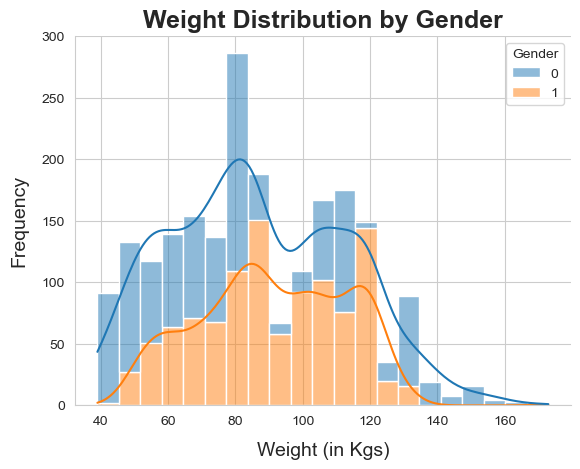

In [35]:
## Lets find the weight distribution by Gender
sns.histplot(data=df, x='Weight', hue='Gender', multiple='stack', kde=True)
plt.title('Weight Distribution by Gender',fontsize=18,fontweight='bold')
plt.xlabel('Weight (in Kgs)',fontsize = 14, labelpad = 10)
plt.ylabel('Frequency',fontsize = 14, labelpad = 10)
sns.despine()
plt.show()

In [36]:
## How many obesity class are they?
df['NObeyesdad'].unique()

array([1, 5, 6, 2, 0, 3, 4])

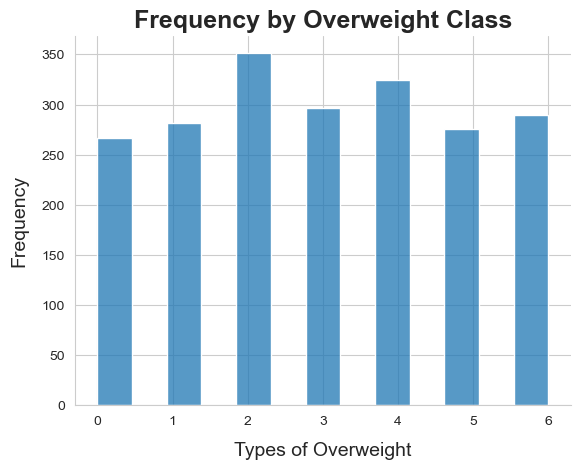

In [37]:
## Quick graph that tells us frequency of type of obesity
sns.histplot(data=df, x='NObeyesdad')
plt.title('Frequency by Overweight Class',fontsize=18,fontweight ='bold')
plt.xlabel('Types of Overweight',fontsize = 14, labelpad = 10)
plt.ylabel('Frequency',fontsize = 14, labelpad = 10)
sns.despine()
plt.show()

## Logistic Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [39]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [40]:
## Independent and dependent variables

X = df.drop('NObeyesdad',axis=1) ## all the rows except for the target
y = df['NObeyesdad'] ## target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
## Standard Scaler
## Normalizing variable for model
from sklearn.preprocessing import StandardScaler

In [43]:
## Initiating Scaler
scaler = StandardScaler()

In [44]:
## Normalized Data
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)

In [45]:
## Instanciate Model
LM = LogisticRegression()

In [46]:
## Determining parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support L1/L2
    'max_iter': [100, 200, 500]  # Number of iterations for convergence
}


In [47]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  
                           cv=5,  
                           n_jobs=-1) 

In [48]:
## Looking for best fit
grid_search.fit(scaler_X_train , y_train)

C:\Users\Thomas Breton\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [49]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(scaler_X_test)
# Evaluate performance

accuracy = accuracy_score(y_test, y_pred)

# Print results with better formatting
print(f"\nBest Model: {best_model}")
print(f"Model Accuracy: {accuracy:.2%}")  # Converts accuracy to percentage format
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best Model: LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=42,
                   solver='saga')
Model Accuracy: 93.47%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        93
           1       0.97      0.83      0.90       103
           2       0.98      0.95      0.96       116
           3       0.97      1.00      0.99       103
           4       0.99      1.00      1.00       102
           5       0.80      0.86      0.83        88
           6       0.85      0.92      0.88        84

    accuracy                           0.93       689
   macro avg       0.93      0.93      0.93       689
weighted avg       0.94      0.93      0.94       689



## Model has a 93.47% accuracy score, pretty good!

## Random Forest Classifier

In [50]:
## RandomForestClassfier
from sklearn.ensemble import RandomForestClassifier
## RFC Model
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
## Running model
rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [53]:
## Prediction
y_pred1 = rfmodel.predict(X_test)

In [54]:
## Evaluation of Model
accuracy = accuracy_score(y_test,y_pred1)

In [55]:
## Evaluation of Model
print(f"Random Forest Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Random Forest Accuracy: 95.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.86      0.92      0.89        61
           2       1.00      0.96      0.98        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.85      0.90        55
           6       0.89      0.98      0.93        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [56]:
print(type(best_model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


## This model works even better, its 95.22% accurate!

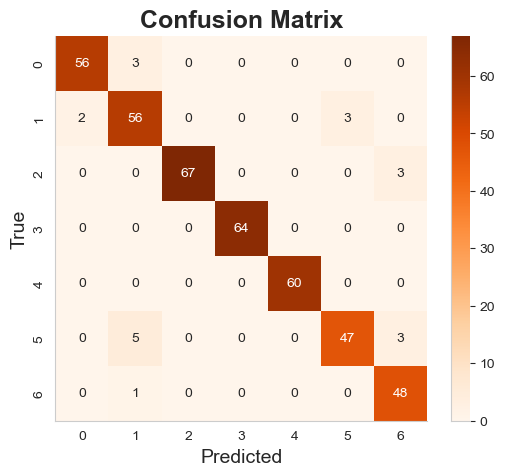

In [61]:
## Confussion matrix for this Logistic Regression Model
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix", fontsize= 18,fontweight='bold')
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("True",fontsize=14)
sns.despine()
plt.show()

## End of Workbook